# The Sparks Foundation

# TASK 2 - Prediction using Unsupervised ML


From the given ‘Iris’ dataset, Predict the optimum number of clusters and represent it visually.

Submitted by- Hrushikesh Shinde

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [9]:
#Import the data
data=pd.read_csv('Iris.csv')


In [10]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
data.shape

(150, 6)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# cheking descriptive statistics of data:

In [13]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000



 note: mean diffrence is not so large in diffrent variables .so we don't need to scale data.

# checking missing values

In [15]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# checking unique values in species

In [17]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# checking duplicated values

In [18]:
data.duplicated().sum()

0

# Removing unwanted columns

In [20]:
df=data.drop(['Id','Species'],axis=1)

In [21]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# creating clusters using K=2

In [22]:
k_means=KMeans(n_clusters=2)
k_means.fit(df)

KMeans(n_clusters=2)

In [23]:
k_means.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Cluster mapping is provided here.0 indicates cluster1 and 1 indicates cluster2. It tells, which record has mapped to which cluster.First record has maped to cluster1... and last record has mapped to cluster2.

In [24]:
k_means.inertia_

152.36870647733915

In [26]:
# it gives the total within sum square for 2 clusters.

# forming clusters for k=1,3,4and 5

In [27]:
k_means=KMeans(n_clusters=1)
k_means.fit(df)
k_means.inertia_

680.8243999999996

In [28]:
k_means=KMeans(n_clusters=3)
k_means.fit(df)
k_means.inertia_

78.94084142614601

In [29]:
k_means=KMeans(n_clusters=4)
k_means.fit(df)
k_means.inertia_

57.317873214285726

In [30]:
k_means=KMeans(n_clusters=5)
k_means.fit(df)
k_means.inertia_

46.535582051282034

# claculating WSS for other values of K-Elbow method

In [31]:
wss=[]
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(df)
    wss.append(KM.inertia_)

In [32]:
wss

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.34540931571815,
 46.535582051282034,
 38.95701115711987,
 34.32508172302736,
 29.879919754370558,
 28.060843137254913,
 26.663195976342603]

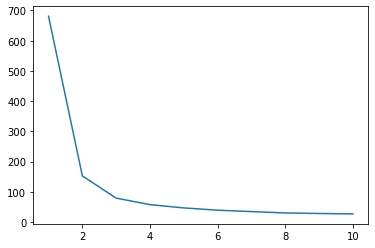

In [33]:
plt.plot(range(1,11),wss)

# conclusion:
we can conclude here, there is siginificant drop in within sum square(WSS) from 1to 2 and 2 to 3.But after 3 drop is very less.




Three is a optimal number of clusters here.



# Applying kmeans to the dataset / Creating the kmeans classifier for K=3

In [37]:
x =df.iloc[:, [0, 1, 2, 3]].values

In [39]:
k_means = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
k_means.fit(df)
label=k_means.labels_
y_kmeans = k_means.fit_predict(x)

In [40]:

label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [41]:
df["Clust_label"]=label

In [46]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Clust_label
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [47]:
# now we are going to perfomn silhouette algo ,to find mapping of each 
#cluster record to different cluster is correct or not.

# cluster evaluation for 3 clusters:silhouette score

In [48]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [52]:
silhouette_score(df,label)  # avg silwidth

0.684936462996038

In [51]:
sw=silhouette_samples(df,label)

In [54]:
df["sil_witdh"]=sw   # create a column sil_width

In [56]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Clust_label,sil_witdh
0,5.1,3.5,1.4,0.2,1,0.857526
1,4.9,3.0,1.4,0.2,1,0.825345
2,4.7,3.2,1.3,0.2,1,0.836423
3,4.6,3.1,1.5,0.2,1,0.814420
4,5.0,3.6,1.4,0.2,1,0.852972


In [57]:

silhouette_samples(df,label).min()

0.22980671259172963

# conclusion:
Since minimum value of silwidth is positive.Hence, we can say all the records are correctly mapped to clusters.

# Visualising the clusters - On the first two columns(SepalLenght and SepalWidth)

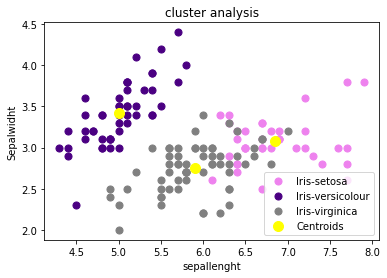

In [65]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 50, c = 'violet', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 50, c = 'indigo', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 50, c = 'gray', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.xlabel("sepallenght")
plt.ylabel("Sepalwidht")
plt.title("cluster analysis")

plt.legend()

# Conclusion:
Flowers having Sepallenght between 5 to 7 and Sepalwidth between 2 to 3.4(low in range) are Iris-setosa.

Flowers having Sepallenght between 4.1 to 5.9(low in range) and Sepal width between 2.3 to 4.5 are Iris-versicolour.

Flowers having Sepallenght between 6.1 to 7.9(high in range) and Sepalwidth between 2.4 to 3.9 are Iris-virginica.

# THANK YOU